# Hourly Dataset

## Importing Libraries

In [33]:
import numpy as np
import pandas as pd

## Loading Datsets

* Loading Hourly Steps file

In [34]:
h1=pd.read_csv("/content/hourlySteps_merged.csv")
h1.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


* Loading Hourly Calories file

In [35]:
h2=pd.read_csv("/content/hourlyCalories_merged.csv")
h2.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


* Merging both Hourly Stpes and Calories files

In [36]:
merge=pd.merge(h1,h2, on=['Id','ActivityHour'], how='left')
merge.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,4/12/2016 12:00:00 AM,373,81
1,1503960366,4/12/2016 1:00:00 AM,160,61
2,1503960366,4/12/2016 2:00:00 AM,151,59
3,1503960366,4/12/2016 3:00:00 AM,0,47
4,1503960366,4/12/2016 4:00:00 AM,0,48


* Loading Hourly Intensities file

In [37]:
h3=pd.read_csv("/content/hourlyIntensities_merged.csv")
h3.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


* Merging both previously merged file and Hourly Intensities file

In [38]:
hour_data_merge=pd.merge(merge,h3, on=['Id','ActivityHour'], how='left')
hour_data_merge.head()

,Id,ActivityHour,StepTotal,Calories,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,373,81,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,160,61,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,151,59,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,47,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,48,0,0.000000


## Data Cleaning

* Now we split the **ActivityHour** column into two seperate colums **Activity_Date** and **Activity_Hour**

In [39]:
hour_data_merge[['Activity_Date','Activity_Hour']]= hour_data_merge['ActivityHour'].str.split(' ', 1, expand=True)
hour_data_merge.tail()

<ipython-input-39-99be624c652b>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  hour_data_merge[['Activity_Date','Activity_Hour']]= hour_data_merge['ActivityHour'].str.split(' ', 1, expand=True)


,Id,ActivityHour,StepTotal,Calories,TotalIntensity,AverageIntensity,Activity_Date,Activity_Hour
22094,8877689391,5/12/2016 10:00:00 AM,514,126,12,0.200000,5/12/2016,10:00:00 AM
22095,8877689391,5/12/2016 11:00:00 AM,1407,192,29,0.483333,5/12/2016,11:00:00 AM
22096,8877689391,5/12/2016 12:00:00 PM,3135,321,93,1.550000,5/12/2016,12:00:00 PM
22097,8877689391,5/12/2016 1:00:00 PM,307,101,6,0.100000,5/12/2016,1:00:00 PM
22098,8877689391,5/12/2016 2:00:00 PM,457,113,9,0.150000,5/12/2016,2:00:00 PM


* Now we will drop the **ActivityHour** Column as we split it, so we don't need this column now.

In [40]:
hour_data_merge.drop(['ActivityHour'], axis=1)

,Id,StepTotal,Calories,TotalIntensity,AverageIntensity,Activity_Date,Activity_Hour
0,1503960366,373,81,20,0.333333,4/12/2016,12:00:00 AM
1,1503960366,160,61,8,0.133333,4/12/2016,1:00:00 AM
2,1503960366,151,59,7,0.116667,4/12/2016,2:00:00 AM
3,1503960366,0,47,0,0.000000,4/12/2016,3:00:00 AM
4,1503960366,0,48,0,0.000000,4/12/2016,4:00:00 AM
...,...,...,...,...,...,...,...
22094,8877689391,514,126,12,0.200000,5/12/2016,10:00:00 AM
22095,8877689391,1407,192,29,0.483333,5/12/2016,11:00:00 AM
22096,8877689391,3135,321,93,1.550000,5/12/2016,12:00:00 PM
22097,8877689391,307,101,6,0.100000,5/12/2016,1:00:00 PM


* Now we will changed the column order

In [41]:
hour_data_merge=hour_data_merge[['Id','Activity_Date','Activity_Hour','StepTotal','Calories','TotalIntensity','AverageIntensity']]

In [42]:
hour_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   Activity_Date     22099 non-null  object 
 2   Activity_Hour     22099 non-null  object 
 3   StepTotal         22099 non-null  int64  
 4   Calories          22099 non-null  int64  
 5   TotalIntensity    22099 non-null  int64  
 6   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.3+ MB


* Now we will change the data type of Activity_Date column to Date data type

In [43]:
hour_data_merge['Activity_Date'] = pd.to_datetime(hour_data_merge['Activity_Date'].str.strip())

In [44]:
hour_data_merge.head()

,Id,Activity_Date,Activity_Hour,StepTotal,Calories,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12,12:00:00 AM,373,81,20,0.333333
1,1503960366,2016-04-12,1:00:00 AM,160,61,8,0.133333
2,1503960366,2016-04-12,2:00:00 AM,151,59,7,0.116667
3,1503960366,2016-04-12,3:00:00 AM,0,47,0,0.000000
4,1503960366,2016-04-12,4:00:00 AM,0,48,0,0.000000


In [45]:
hour_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   Activity_Date     22099 non-null  datetime64[ns]
 2   Activity_Hour     22099 non-null  object        
 3   StepTotal         22099 non-null  int64         
 4   Calories          22099 non-null  int64         
 5   TotalIntensity    22099 non-null  int64         
 6   AverageIntensity  22099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 1.3+ MB


* Round off the AverageIntensity values

In [46]:
hour_data_merge['AverageIntensity'] = np.round(hour_data_merge['AverageIntensity'],decimals = 2)
hour_data_merge.head()

,Id,Activity_Date,Activity_Hour,StepTotal,Calories,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12,12:00:00 AM,373,81,20,0.33
1,1503960366,2016-04-12,1:00:00 AM,160,61,8,0.13
2,1503960366,2016-04-12,2:00:00 AM,151,59,7,0.12
3,1503960366,2016-04-12,3:00:00 AM,0,47,0,0.00
4,1503960366,2016-04-12,4:00:00 AM,0,48,0,0.00


In [47]:
hour_data_merge=hour_data_merge.rename(columns = {'StepTotal':'Step_Total', 'TotalIntensity':'Total_Intensity',
                              'AverageIntensity':'Average_Intensity'})

In [48]:
hour_data_merge

,Id,Activity_Date,Activity_Hour,Step_Total,Calories,Total_Intensity,Average_Intensity
0,1503960366,2016-04-12,12:00:00 AM,373,81,20,0.33
1,1503960366,2016-04-12,1:00:00 AM,160,61,8,0.13
2,1503960366,2016-04-12,2:00:00 AM,151,59,7,0.12
3,1503960366,2016-04-12,3:00:00 AM,0,47,0,0.00
4,1503960366,2016-04-12,4:00:00 AM,0,48,0,0.00
...,...,...,...,...,...,...,...
22094,8877689391,2016-05-12,10:00:00 AM,514,126,12,0.20
22095,8877689391,2016-05-12,11:00:00 AM,1407,192,29,0.48
22096,8877689391,2016-05-12,12:00:00 PM,3135,321,93,1.55
22097,8877689391,2016-05-12,1:00:00 PM,307,101,6,0.10


In [49]:
hour_data_merge.to_csv("hourly_data.csv")

# Data Vizualization

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Scatter Plot for **Step_Total** VS **Calories**

In [53]:
fig = px.scatter(hour_data_merge, x='Step_Total', y='Calories', title='Scatter Plot: Step Total vs Calories',
                 labels={'Step_Total': 'Total Step ', 'Calories': 'Calories'},
                 color_discrete_sequence=['purple'])
fig.show()

## Pair Plot for all the Numerical Values

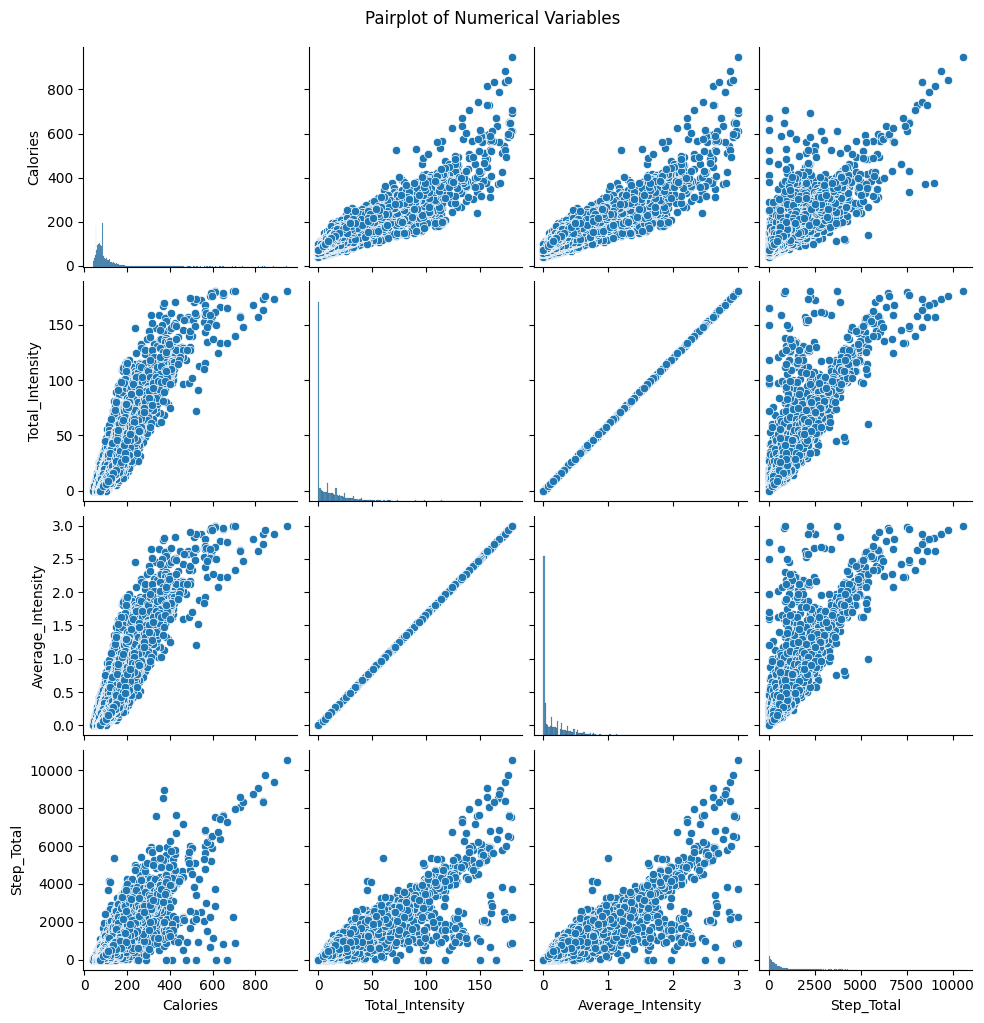

In [57]:
sns.pairplot(hour_data_merge[['Calories', 'Total_Intensity', 'Average_Intensity', 'Step_Total']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

## Create a Histogram

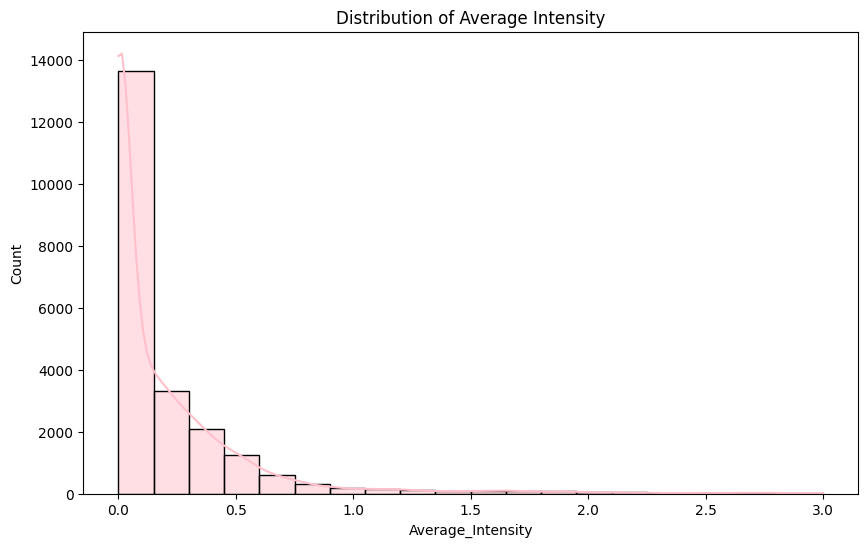

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(hour_data_merge['Average_Intensity'], bins=20, kde=True, color='pink')
plt.title('Distribution of Average Intensity')
plt.show()

## Box Plot for Calories by Activity_Date

<ipython-input-63-0fdfbeb8d67f>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




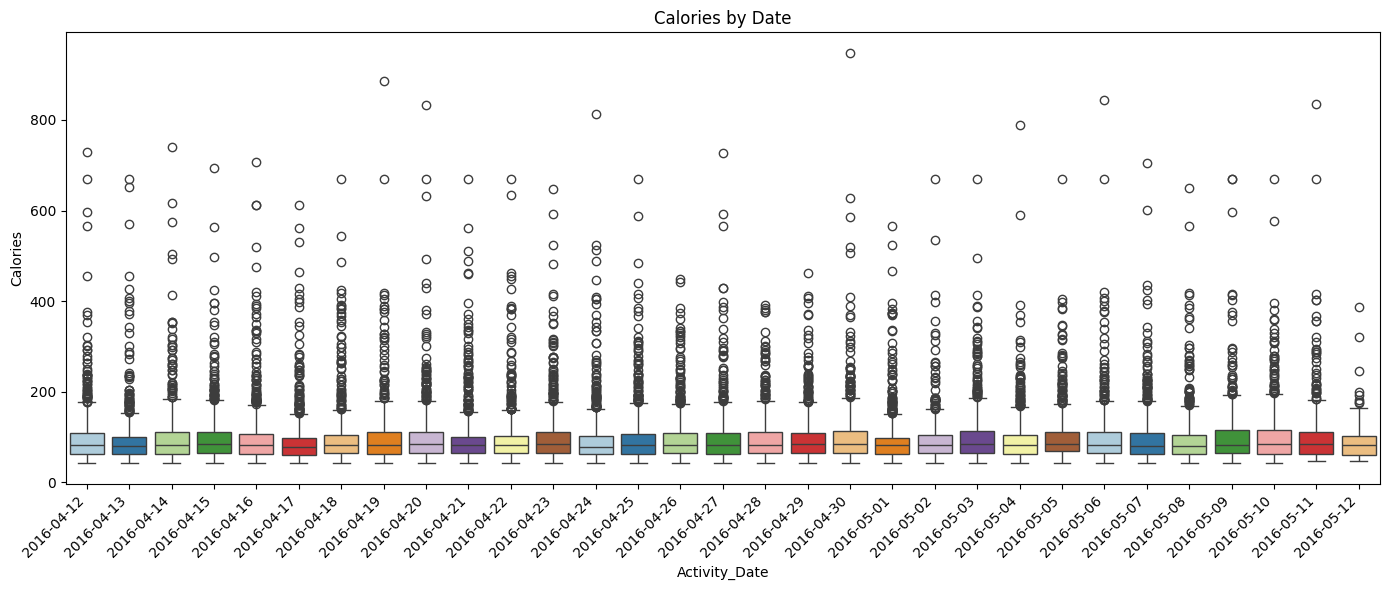

In [63]:

plt.figure(figsize=(14, 6))
sns.boxplot(x='Activity_Date', y='Calories', data=hour_data_merge, palette="Paired")
plt.title('Calories by Date')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()